#### Exploratory Data Analysis

Dream Housing Finance company deals in all home loans. They have a presence across urban, semi-urban, and rural areas. Customers first apply for home loan after that company validates the customers eligibility for the loan.

While filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others.

The Dataset has been sourced from Kaggle https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset and the data was readily split into test and train datasets.
 for EDA we have to just use the training dataset.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv('loan-train.csv')
df_test=pd.read_csv('loan-train.csv')

##### It was observed that testing dataset had excluded the target column, which we will go about in the later stages.

##### Description of features:
1. Loan_ID: 	Unique Loan ID
2. Gender: 	Male/ Female
3. Married: 	Applicant married (Y/N)
4. Dependents: 	Number of dependents
4. Education: 	Applicant Education (Graduate/ Under Graduate)
6. Self_Employed: 	Self employed (Y/N)
7. ApplicantIncome: 	Applicant income
8. CoapplicantIncome: 	Coapplicant income
9. LoanAmount: 	Loan amount in thousands
10. Loan_Amount_Term: 	Term of loan in months
11. Credit_History: 	credit history meets guidelines
12. Property_Area: 	Urban/ Semi Urban/ Rural
13. Loan_Status:	Loan approved (Y/N)

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_train['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [6]:
df_train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [7]:
#### Tree and non tree seperate encoding treatments
df_test['Loan_Status'].dtype

dtype('O')

In [8]:
# coapplicant income can be converted to int type to save memory, along with above two columns to be converted to object datatypes
df_train['Credit_History']=df_train['Credit_History'].astype(object)
df_train['Loan_Amount_Term']=df_train['Loan_Amount_Term'].astype(object)
df_train['CoapplicantIncome']=df_train['CoapplicantIncome'].astype(int)

df_test['Credit_History']=df_test['Credit_History'].astype(object)
df_test['Loan_Amount_Term']=df_test['Loan_Amount_Term'].astype(object)
df_test['CoapplicantIncome']=df_test['CoapplicantIncome'].astype(int)

In [9]:
df_train.shape

(614, 13)

In [10]:
round((df_train.isnull().sum()/df_train.shape[0]*100), 2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [11]:
#Dropping irrelevant columns
df_train=df_train.drop('Loan_ID', axis=1)
df_test=df_test.drop('Loan_ID', axis=1)

Above number of null values are reasonable acceptable and can be treated further

###### For further analysis we can look into histograms for numerical columns -> testing for skewness
###### for categorical columns we need to look at the pie charts -> testing the spread of the data 
###### for numerical columns we need to look at the outliers using boxplot
###### for numerical columns we need to check whether multicollinearity exists using heatmaps


###### OLS

In [12]:
# Imputing Null Values mean imputation for numerical and median imputation for categorical features
def impute(df):
    df_cat=df.select_dtypes(object)
    df_num=df.select_dtypes(include=np.number)
    for i in df_num.columns:
        m1=df[i].mean()
        df_num[i]=df_num[i].fillna(m1)

    for i in df_cat.columns:
        m2=df[i].mode()
        df_cat[i]=df_cat[i].fillna(m2)
    return df_num, df_cat

In [13]:
df_test_num, df_test_cat=impute(df_test)
df_train_num, df_train_cat=impute(df_train)

/tmp/ipykernel_10653/4070034070.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cat[i]=df_cat[i].fillna(m2)
/tmp/ipykernel_10653/4070034070.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cat[i]=df_cat[i].fillna(m2)


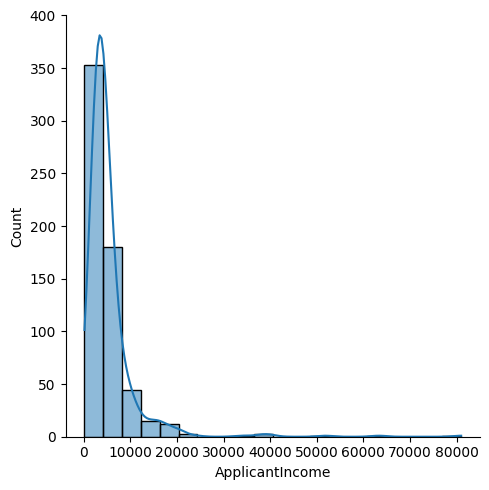

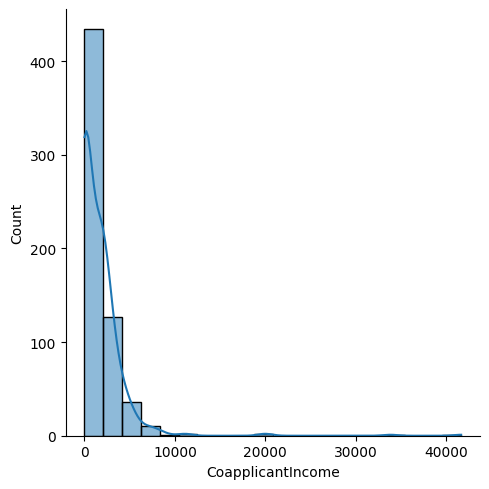

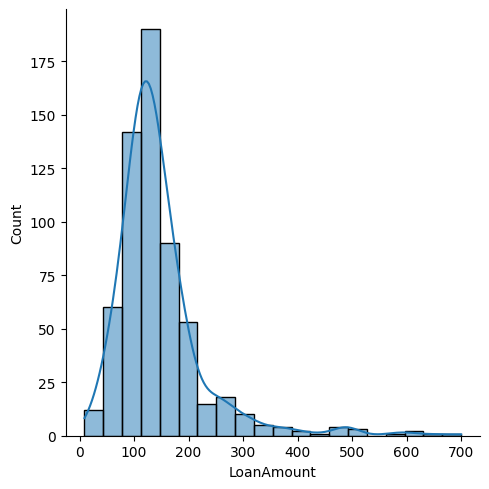

In [14]:
for i in df_train_num.columns:
    sns.displot(df_train_num[i], bins=20, kde=True)

#### Checking for outliers

<Axes: xlabel='ApplicantIncome'>

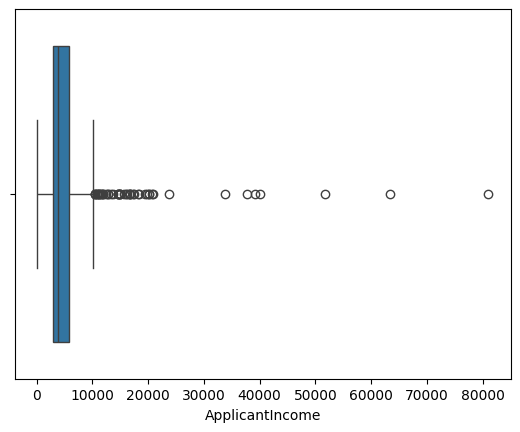

In [15]:
sns.boxplot(x=df_train_num['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome'>

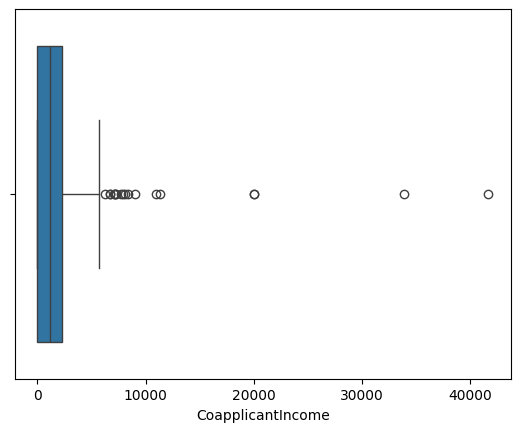

In [16]:
sns.boxplot(x=df_train_num['CoapplicantIncome'])

<Axes: xlabel='LoanAmount'>

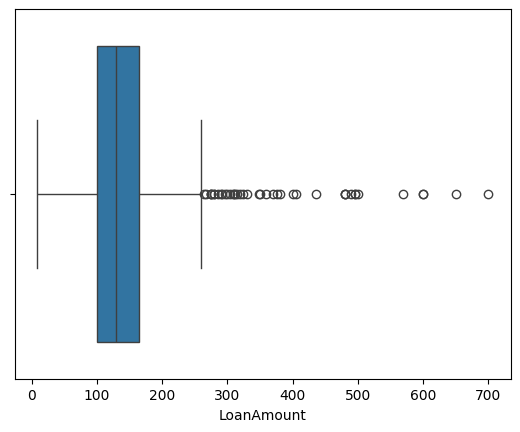

In [17]:
sns.boxplot(x=df_train_num['LoanAmount'])

by the above histogram plots, we can know that the features are highly right skewed. 

Reason being high number of outliers present in the dataset, which was observed by the boxplot.

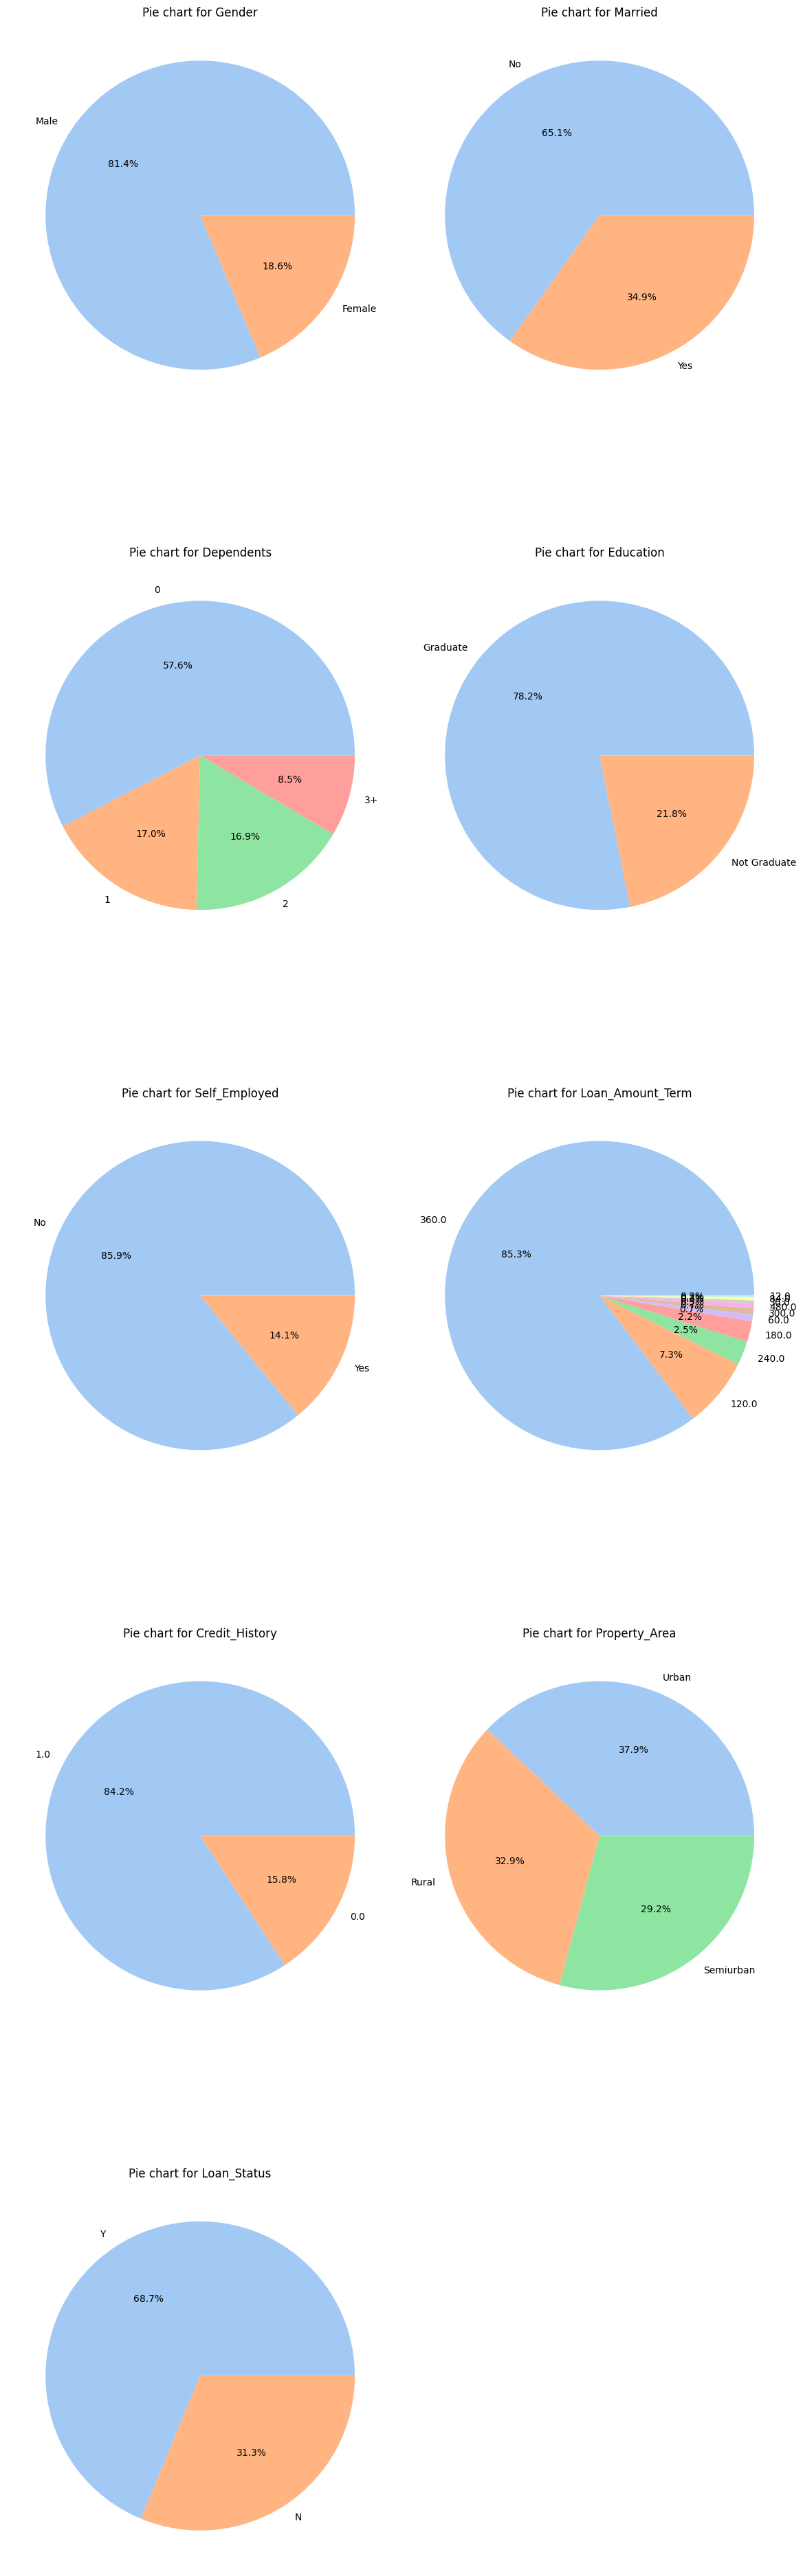

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
fig = plt.figure(figsize=(12, 40))

# Loop through each column in the DataFrame to create a pie chart
for i, col in enumerate(df_train_cat.columns):
    # Drop missing values
    valid_data = df_train_cat[col].dropna()

    # Get unique labels and percentages
    classlabels = list(valid_data.unique())
    percentage = valid_data.value_counts(normalize=True) * 100

    # Create a subplot
    ax = plt.subplot(5, 2, i + 1)
    ax.pie(
        percentage,
        labels=classlabels,
        autopct='%1.1f%%',
        colors=sns.color_palette('pastel', len(classlabels))
    )
    ax.set_title(f'Pie chart for {col}')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


<Axes: >

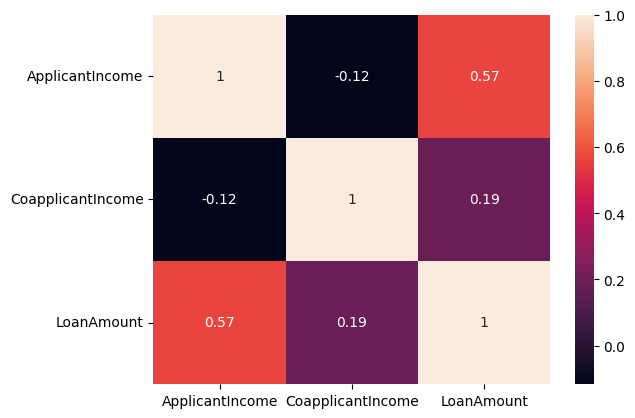

In [19]:
sns.heatmap(df_train_num.corr(), annot=True)

### Feature Engineering

In [20]:
#checking if the numerical columns have negetive values before applying log transformation

Neg_check = df_train_num[df_train_num < 0].any(axis=1)  # Returns rows with any negative value
df_train_num[Neg_check]


,ApplicantIncome,CoapplicantIncome,LoanAmount


In [21]:
#Using log transformation for treating outliers
from sklearn.preprocessing import FunctionTransformer
transform = FunctionTransformer(func=np.log1p)

df_train_num = transform.fit_transform(df_train_num)
df_test_num = transform.fit_transform(df_test_num)

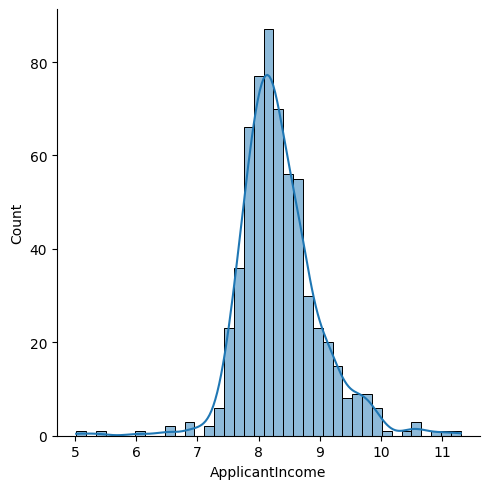

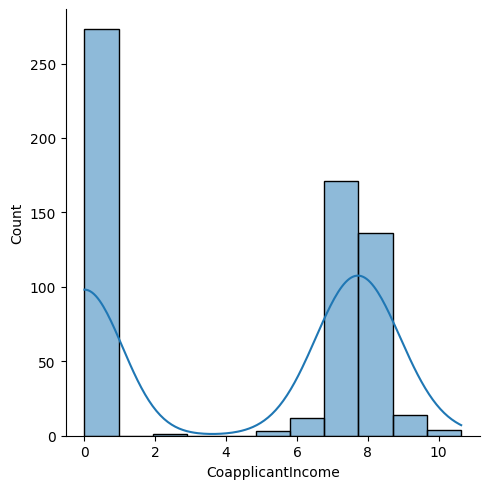

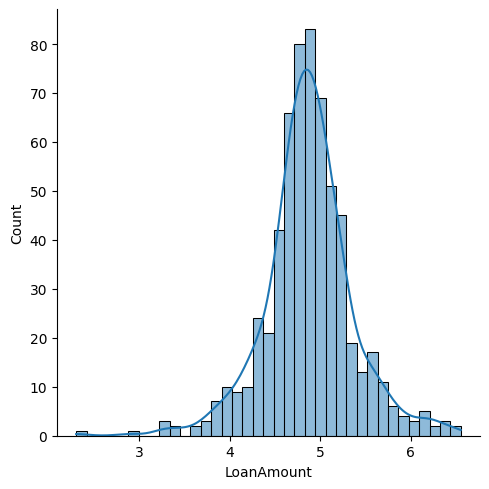

In [22]:
for i in df_train_num.columns:
    sns.displot(df_train_num[i], kde=True)

In [23]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
def encoding(df):
    label=LabelEncoder()
    for i in df.columns:
        if df[i].dtype == object:
            df[i]=label.fit_transform(df[i])
    return df

df_test_cat=encoding(df_test_cat)
df_train_cat=encoding(df_train_cat)

In [25]:
#Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df_train_num_scaled = pd.DataFrame(scaler.fit_transform(df_train_num), columns=df_train_num.columns, 
                                   index=df_train_num.index)

# Scale the test data (using the scaler fitted on training data)
df_test_num_scaled = pd.DataFrame(scaler.transform(df_test_num), columns=df_test_num.columns, 
                                  index=df_test_num.index)

/home/roopesh-j/anaconda3/envs/visual/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [31]:
df_test=pd.concat([df_test_num_scaled, df_test_cat], axis=1)
df_train=pd.concat([df_train_num_scaled, df_train_cat], axis=1)

In [33]:
X_train=df_train.drop(['Loan_Status'], axis=1)
y_train=df_train['Loan_Status']
X_test=df_test

In [38]:
X_train.head()

,0,1,2,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,0.516186,-1.107779,0.249219,1,0,0,0,0,360.0,1.0,2
1,0.137806,0.782160,-0.022525,1,1,1,0,0,360.0,1.0,0
2,-0.519479,-1.107779,-1.356846,1,1,0,0,1,360.0,1.0,2
3,-0.751605,0.897529,-0.152922,1,1,0,1,0,360.0,1.0,2
4,0.555727,-1.107779,0.173033,1,0,0,0,0,360.0,1.0,2


### Model Selection and Training

In [34]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.